In this implementation:
- Missing values are treated as a separate category i.e. we do not replace missing values with NaN.
- Use 99:1 train to validation set ratio.


In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.structured import *
from fastai.column_data import *

In [3]:
# Set printing options. 
# These options determine the way floating point numbers, arrays and
# other NumPy objects are displayed.
np.set_printoptions(threshold=50, edgeitems=20)

### Set data path

In [4]:
#PATH = 'data/porto-seguro/'
PATH = '/home/jd/data/PortoDriver/'

### Read csv data into dataframe

In [5]:
train_data_df = pd.read_csv(f'{PATH}train.csv')
test_data_df = pd.read_csv(f'{PATH}test.csv')

# I need differant Path
#train_data_df = pd.read_csv(f'{PATH}train/train.csv')
#test_data_df = pd.read_csv(f'{PATH}test/test.csv')

In [6]:
len(test_data_df.id)

892816

In [7]:
# test_data need target
test_data_df['target']=0

### List of column names

In [8]:
all_var = [var for var in train_data_df.columns]

In [9]:
all_var

['id',
 'target',
 'ps_ind_01',
 'ps_ind_02_cat',
 'ps_ind_03',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_14',
 'ps_ind_15',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin']

### Create list of categorical and continuous variables

In [10]:
cat_vars = [var for var in train_data_df.columns if var.endswith('cat')]
bin_vars = [var for var in train_data_df.columns if var.endswith('bin')]
ind_vars = ['ps_ind_01', 'ps_ind_03','ps_ind_14', 'ps_ind_15']
cat_vars = cat_vars + bin_vars #+ ind_vars
cat_vars

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin']

In [11]:
cont_vars = [var for var in train_data_df.columns if var not in cat_vars]
cont_vars

['id',
 'target',
 'ps_ind_01',
 'ps_ind_03',
 'ps_ind_14',
 'ps_ind_15',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14']

In [12]:
for var in cat_vars: 
    train_data_df[var] = train_data_df[var].astype('category').cat.as_ordered()
    test_data_df[var] = test_data_df[var].astype('category').cat.as_ordered()

In [13]:
for var in cont_vars:
    train_data_df[var] = train_data_df[var].astype('float32')
    test_data_df[var] = test_data_df[var].astype('float32')

In [14]:
del cont_vars[1]

In [15]:
cont_vars

['id',
 'ps_ind_01',
 'ps_ind_03',
 'ps_ind_14',
 'ps_ind_15',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14']

In [16]:
train_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null float32
target            595212 non-null float32
ps_ind_01         595212 non-null float32
ps_ind_02_cat     595212 non-null category
ps_ind_03         595212 non-null float32
ps_ind_04_cat     595212 non-null category
ps_ind_05_cat     595212 non-null category
ps_ind_06_bin     595212 non-null category
ps_ind_07_bin     595212 non-null category
ps_ind_08_bin     595212 non-null category
ps_ind_09_bin     595212 non-null category
ps_ind_10_bin     595212 non-null category
ps_ind_11_bin     595212 non-null category
ps_ind_12_bin     595212 non-null category
ps_ind_13_bin     595212 non-null category
ps_ind_14         595212 non-null float32
ps_ind_15         595212 non-null float32
ps_ind_16_bin     595212 non-null category
ps_ind_17_bin     595212 non-null category
ps_ind_18_bin     595212 non-null category
ps_reg_01         595212 non-null f

### Display training data sample

In [17]:
train_data_df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7.0,0.0,2.0,2,5.0,1,0,0,1,0,...,9.0,1.0,5.0,8.0,0,1,1,0,0,1
1,9.0,0.0,1.0,1,7.0,0,0,0,0,1,...,3.0,1.0,1.0,9.0,0,1,1,0,1,0
2,13.0,0.0,5.0,4,9.0,1,0,0,0,1,...,4.0,2.0,7.0,7.0,0,1,1,0,1,0
3,16.0,0.0,0.0,1,2.0,0,0,1,0,0,...,2.0,2.0,4.0,9.0,0,0,0,0,0,0
4,17.0,0.0,0.0,2,0.0,1,0,1,0,0,...,3.0,1.0,1.0,3.0,0,0,0,1,1,0


### Display test data sample

In [18]:
test_data_df.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,target
0,0.0,0.0,1,8.0,1,0,0,1,0,0,...,1.0,1.0,12.0,0,1,1,0,0,1,0.0
1,1.0,4.0,2,5.0,1,0,0,0,0,1,...,0.0,3.0,10.0,0,0,1,1,0,1,0.0
2,2.0,5.0,1,3.0,0,0,0,0,0,1,...,0.0,2.0,4.0,0,0,0,0,0,0,0.0
3,3.0,0.0,1,6.0,0,0,1,0,0,0,...,1.0,0.0,5.0,1,0,1,0,0,0,0.0
4,4.0,5.0,1,7.0,0,0,0,0,0,1,...,0.0,0.0,4.0,0,1,1,0,0,1,0.0


### Create validation set indices

In [19]:
# Tune VAL_PCT hyperparameter
# Tune MAX_FOLDS hyperparameter
VAL_FRAC = 0.01
MAX_FOLDS = 5

num_obs = train_data_df.shape[0]

cv_dict = {f'ids_fold_{num_fold}': get_cv_idxs(n=num_obs, cv_idx=num_fold, val_pct=VAL_FRAC) for num_fold in range(MAX_FOLDS)}

In [20]:
len(cv_dict['ids_fold_0'])

5952

### Set response variable

In [21]:
TARGET_VAR = "target"

### Train set, response variable, feature scaling

In [22]:
train, target, nas, mapper = proc_df(df=train_data_df, y_fld=TARGET_VAR, do_scale=True)

# for test
test_df, target2, nas2, mapper2 = proc_df(df=test_data_df, y_fld=TARGET_VAR, do_scale=True, #skip_flds=['id'],
                                  mapper=mapper, na_dict=nas)

### Convert categorical values to type `category`

In [23]:
for var in cat_vars: 
    train[var] = train[var].astype('category').cat.as_ordered()
    test_df[var] = test_df[var].astype('category').cat.as_ordered()

### Convert remaining variables to `float32`

In [24]:
for var in cont_vars:
    train[var] = train[var].astype('float32')
    test_df[var] = test_df[var].astype('float32')

target.astype('float32')

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
       ...,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 58 columns):
id                595212 non-null float32
ps_ind_01         595212 non-null float32
ps_ind_02_cat     595212 non-null category
ps_ind_03         595212 non-null float32
ps_ind_04_cat     595212 non-null category
ps_ind_05_cat     595212 non-null category
ps_ind_06_bin     595212 non-null category
ps_ind_07_bin     595212 non-null category
ps_ind_08_bin     595212 non-null category
ps_ind_09_bin     595212 non-null category
ps_ind_10_bin     595212 non-null category
ps_ind_11_bin     595212 non-null category
ps_ind_12_bin     595212 non-null category
ps_ind_13_bin     595212 non-null category
ps_ind_14         595212 non-null float32
ps_ind_15         595212 non-null float32
ps_ind_16_bin     595212 non-null category
ps_ind_17_bin     595212 non-null category
ps_ind_18_bin     595212 non-null category
ps_reg_01         595212 non-null float32
ps_reg_02         595212 non-null f

### Gini metric

In [26]:
from sklearn.metrics import roc_auc_score

inv_log = lambda x : np.exp(x)

def gini_metric(preds, targs):
    preds = inv_log(preds)
    auc = roc_auc_score(y_true=targs, y_score=preds)
    return 2 * auc - 1

### Create embeddings

In [27]:
cat_sz = [(c, len(train[c].cat.categories) + 1) for c in cat_vars]

In [28]:
cat_sz

[('ps_ind_02_cat', 6),
 ('ps_ind_04_cat', 4),
 ('ps_ind_05_cat', 9),
 ('ps_car_01_cat', 14),
 ('ps_car_02_cat', 4),
 ('ps_car_03_cat', 4),
 ('ps_car_04_cat', 11),
 ('ps_car_05_cat', 4),
 ('ps_car_06_cat', 19),
 ('ps_car_07_cat', 4),
 ('ps_car_08_cat', 3),
 ('ps_car_09_cat', 7),
 ('ps_car_10_cat', 4),
 ('ps_car_11_cat', 105),
 ('ps_ind_06_bin', 3),
 ('ps_ind_07_bin', 3),
 ('ps_ind_08_bin', 3),
 ('ps_ind_09_bin', 3),
 ('ps_ind_10_bin', 3),
 ('ps_ind_11_bin', 3),
 ('ps_ind_12_bin', 3),
 ('ps_ind_13_bin', 3),
 ('ps_ind_16_bin', 3),
 ('ps_ind_17_bin', 3),
 ('ps_ind_18_bin', 3),
 ('ps_calc_15_bin', 3),
 ('ps_calc_16_bin', 3),
 ('ps_calc_17_bin', 3),
 ('ps_calc_18_bin', 3),
 ('ps_calc_19_bin', 3),
 ('ps_calc_20_bin', 3)]

In [29]:
emb_szs = [(c, min(100, (c + 1) // 2)) for _, c in cat_sz]

In [30]:
emb_szs

[(6, 3),
 (4, 2),
 (9, 5),
 (14, 7),
 (4, 2),
 (4, 2),
 (11, 6),
 (4, 2),
 (19, 10),
 (4, 2),
 (3, 2),
 (7, 4),
 (4, 2),
 (105, 53),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2)]

### Model Architecture / Hyperparameters

In [31]:
layer_1 = 1024
layer_2 = 512
layer_3 = 256
batch_size = 256
embed_dropout = 0.01
layer_dropout = 0.15

In [32]:
# Original
# Create model with all category variables
#md = ColumnarModelData.from_data_frame(path=PATH, 
#                                       val_idxs=cv_dict['ids_fold_0'], 
#                                       df=train, 
#                                       y=target, 
#                                       cat_flds=cat_vars, 
#                                       bs=batch_size)

In [34]:
# Create model with a test to allow for predictions
md = ColumnarModelData.from_data_frame(path=PATH, 
                                       val_idxs=cv_dict['ids_fold_0'], 
                                       df=train, 
                                       y=target, 
                                       cat_flds=cat_vars, 
                                       bs=batch_size,
                                       test_df=test_df)

### Model learner

In [35]:
# Use all categorical variables
m = md.get_learner(emb_szs=emb_szs, 
                   n_cont=(len(train.columns) - len(cat_vars)),
                   emb_drop=embed_dropout, 
                   out_sz=1, 
                   szs=[layer_1, layer_2], 
                   drops=[layer_dropout, layer_dropout], 
                   y_range=None)


In [36]:
m.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 61%|██████    | 1409/2302 [00:12<00:07, 113.32it/s, loss=0.287] 

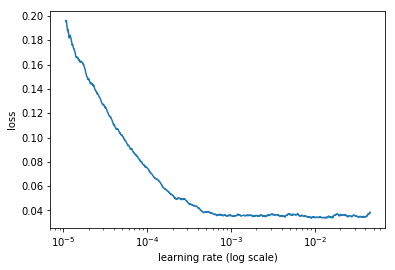

In [37]:
m.sched.plot()

In [38]:
lr = 0.0001

In [39]:
m.fit(lrs=lr, n_cycle=12, metrics=[accuracy, gini_metric])

HBox(children=(IntProgress(value=0, description='Epoch', max=12), HTML(value='')))


  4%|▍         | 101/2302 [00:02<00:58, 37.46it/s, loss=0.1]


  9%|▉         | 205/2302 [00:04<00:44, 47.59it/s, loss=0.0657]


 14%|█▍        | 317/2302 [00:05<00:32, 61.60it/s, loss=0.0515]


 19%|█▊        | 429/2302 [00:05<00:26, 71.68it/s, loss=0.0445]


 24%|██▎       | 541/2302 [00:06<00:22, 79.28it/s, loss=0.0406]


 26%|██▌       | 597/2302 [00:07<00:20, 82.74it/s, loss=0.0402]

 27%|██▋       | 626/2302 [00:07<00:19, 84.43it/s, loss=0.0397] [A

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/home/jd/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/jd/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/jd/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/home/jd/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/jd/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/jd/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



[ 0.       0.03498  0.03578  0.96276  0.12419]                   
[ 1.       0.03573  0.03567  0.96276  0.20386]                   
[ 2.       0.03495  0.03564  0.96276  0.21634]                   
[ 3.       0.03363  0.03557  0.96276  0.24737]                   
[ 4.       0.03699  0.03561  0.96276  0.24592]                   
[ 5.       0.03638  0.0356   0.96276  0.2802 ]                   
[ 6.       0.03441  0.03557  0.96276  0.25009]                   
[ 7.       0.03427  0.03563  0.96276  0.26228]                   
[ 8.       0.03374  0.03563  0.96276  0.2375 ]                   
[ 9.       0.03549  0.03572  0.96276  0.2517 ]                   
[ 10.        0.03442   0.03566   0.96276   0.22788]              
[ 11.        0.03567   0.03581   0.96276   0.20007]              



In [40]:
m.fit(lrs=lr, n_cycle=3, cycle_len=3, metrics=[accuracy, gini_metric], cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=21), HTML(value='')))

[ 0.       0.03459  0.03583  0.96276  0.19747]                   
[ 1.       0.03457  0.0359   0.96276  0.15537]                   
[ 2.       0.03193  0.03591  0.96276  0.16622]                   
[ 3.       0.03306  0.03593  0.96276  0.17236]                   
[ 4.       0.03522  0.03596  0.96276  0.14833]                   
[ 5.       0.03497  0.03605  0.96276  0.1605 ]                   
[ 6.       0.03409  0.03608  0.96276  0.13386]                   
[ 7.       0.03493  0.03612  0.96276  0.14104]                   
[ 8.       0.03295  0.03613  0.96276  0.13849]                   
[ 9.       0.03497  0.03628  0.96276  0.11114]                   
[ 10.        0.03199   0.03631   0.96276   0.09936]              
[ 11.        0.03532   0.03637   0.96276   0.11362]              
[ 12.        0.0338    0.03648   0.96276   0.10494]              
[ 13.        0.03321   0.03653   0.96276   0.11255]              
[ 14.        0.03215   0.03651   0.96276   0.11658]              
[ 15.     

In [41]:
# Predictions for the validation set
m.predict()

array([[ 0.03489],
       [ 0.04164],
       [ 0.02132],
       [ 0.02735],
       [ 0.03289],
       [ 0.05748],
       [ 0.02222],
       [ 0.02562],
       [ 0.01568],
       [ 0.05991],
       [ 0.00314],
       [ 0.03625],
       [ 0.01444],
       [ 0.02386],
       [ 0.0353 ],
       [ 0.04716],
       [ 0.03265],
       [ 0.06221],
       [ 0.02066],
       [ 0.0389 ],
       ..., 
       [ 0.02423],
       [ 0.02121],
       [ 0.01988],
       [ 0.08373],
       [ 0.01586],
       [ 0.08188],
       [ 0.03846],
       [ 0.03031],
       [ 0.01182],
       [ 0.01978],
       [ 0.00243],
       [ 0.05963],
       [ 0.10582],
       [ 0.02574],
       [ 0.02134],
       [ 0.05541],
       [ 0.02148],
       [ 0.0282 ],
       [ 0.01715],
       [ 0.0283 ]], dtype=float32)

In [42]:
m

MixedInputModel (
  (embs): ModuleList (
    (0): Embedding(6, 3)
    (1): Embedding(4, 2)
    (2): Embedding(9, 5)
    (3): Embedding(14, 7)
    (4): Embedding(4, 2)
    (5): Embedding(4, 2)
    (6): Embedding(11, 6)
    (7): Embedding(4, 2)
    (8): Embedding(19, 10)
    (9): Embedding(4, 2)
    (10): Embedding(3, 2)
    (11): Embedding(7, 4)
    (12): Embedding(4, 2)
    (13): Embedding(105, 53)
    (14): Embedding(3, 2)
    (15): Embedding(3, 2)
    (16): Embedding(3, 2)
    (17): Embedding(3, 2)
    (18): Embedding(3, 2)
    (19): Embedding(3, 2)
    (20): Embedding(3, 2)
    (21): Embedding(3, 2)
    (22): Embedding(3, 2)
    (23): Embedding(3, 2)
    (24): Embedding(3, 2)
    (25): Embedding(3, 2)
    (26): Embedding(3, 2)
    (27): Embedding(3, 2)
    (28): Embedding(3, 2)
    (29): Embedding(3, 2)
    (30): Embedding(3, 2)
  )
  (lins): ModuleList (
    (0): Linear (163 -> 1024)
    (1): Linear (1024 -> 512)
  )
  (bns): ModuleList (
    (0): BatchNorm1d(1024, eps=1e-05, momen

## Prediction

In [43]:
m.save('val0')

In [44]:
m.load('val0')

In [45]:
x,y=m.predict_with_targs()

In [46]:
# Why? No idea, stole from Rossman
def inv_y(a): return np.exp(a)

def exp_rmspe(y_pred, targ):
    targ = inv_y(targ)
    pct_var = (targ - inv_y(y_pred))/targ
    return math.sqrt((pct_var**2).mean())

In [47]:
exp_rmspe(x,y)

0.1303443023927846

In [48]:
pred_test=m.predict(True)

In [49]:
test_df['pred_target']=pred_test

In [50]:
test_df['pred_target'][:5]

0    0.035959
1    0.034598
2    0.025253
3    0.022972
4    0.020747
Name: pred_target, dtype: float32

## Analyze

In [58]:
test_df.pred_target.max(), test_df.pred_target.min()

(1.2151047, -0.34298968)

In [59]:
test_df.nlargest(5, 'pred_target')

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,pred_target
590211,0.559664,0.050218,1,-1.638327,1,1,1,1,1,2,...,-1.198640,0.075352,-0.560329,1,2,1,1,2,2,1.215105
94665,-1.365328,-0.957955,1,-1.638327,1,1,1,2,1,1,...,-0.367359,1.255373,-0.196249,2,2,2,1,2,1,0.936474
110917,-1.301809,-0.453868,1,-1.638327,1,1,1,1,2,1,...,0.463923,0.665362,-0.924409,1,2,1,1,1,1,0.875596
437814,-0.032302,0.050218,1,-1.638327,1,1,1,2,1,1,...,0.463923,0.665362,-0.560329,1,2,2,1,1,2,0.861696
772181,1.266297,-0.957955,1,-1.638327,1,1,1,1,2,1,...,0.463923,0.665362,0.531911,1,2,1,2,2,1,0.858151


In [60]:
test_df.nsmallest(5, 'pred_target')

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,pred_target
344477,-0.394989,2.066563,2,0.583978,3,8,1,1,2,1,...,-0.367359,-1.694679,-0.196249,1,1,1,2,1,1,-0.342990
579440,0.517572,0.050218,2,0.213594,2,4,1,1,2,1,...,-0.367359,-0.514659,-2.016649,1,2,1,2,2,2,-0.287718
791900,1.342488,1.562477,2,0.583978,3,4,1,1,2,1,...,-1.198640,-1.104669,-0.560329,2,2,1,2,2,1,-0.285138
17078,-1.666434,0.050218,2,0.954362,2,8,1,1,2,1,...,0.463923,0.075352,0.167831,1,2,2,1,2,1,-0.239584
386996,-0.229651,1.562477,2,1.324746,3,3,1,2,1,1,...,-0.367359,1.255373,-0.924409,1,2,1,1,2,2,-0.227888


## Submission

In [61]:
## Sets up the test use
submission = pd.DataFrame({'id': test_data_df.id, 'target': test_df.pred_target})
submission.id = submission.id.astype(int)
# Shows 5 to ensure formatting is correct
submission[:10]

,id,target
0,0,0.035959
1,1,0.034598
2,2,0.025253
3,3,0.022972
4,4,0.020747
5,5,0.071335
6,6,0.022123
7,8,0.034587
8,10,0.019366
9,11,0.047240


In [62]:
# Makes the submission name out of folders
path3 = PATH +'submits/'
## labels submissions in order
numFiles=len(os.listdir(path3))
subm_name = 'submission'+str(numFiles)+'.csv.gz'

In [54]:
## prints it out to downloaded
submission.to_csv((path3+subm_name), index=False, compression='gzip')
print ('http://localhost:8888/view/data/PortoDriver/submits/'+subm_name)

http://localhost:8888/view/data/PortoDriver/submits/submission22.csv.gz
